In [52]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
import numpy as np
from ase.units import Hartree

# Perform standard ground state calculation (with plane wave basis)
si = bulk('Si', 'diamond', 5.43)
si.center()


calc = GPAW(mode=PW(400),xc='PBE',setups='sg15',
            kpts=(8, 8, 8),symmetry='off',
            occupations=FermiDirac(0.0001))
si.calc = calc
si.get_potential_energy()
calc.write('Si_gs.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   yaroslav@MacBook-Pro-Yaroslav.local
Date:   Wed Apr 24 16:10:39 2019
Arch:   x86_64
Pid:    85449
Python: 2.7.16
gpaw:   /usr/local/lib/python2.7/site-packages/gpaw
_gpaw:  /usr/local/lib/python2.7/site-packages/_gpaw.so
ase:    /usr/local/lib/python2.7/site-packages/ase (version 3.17.0)
numpy:  /usr/local/lib/python2.7/site-packages/numpy (version 1.16.2)
scipy:  /usr/local/lib/python2.7/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: [8 8 8]
  mode: {ecut: 400.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  symmetry: off
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:   Si
  Z:         14
  Valence:  4.0
Projectors:
  l=0 rcut=3

In [53]:
from TimeDependentHamiltonian import TimeDependentHamiltonian
from TimeDependentPropagator import TimeDependentPropagator
import matplotlib.pyplot as plt
%matplotlib inline
TDH=TimeDependentHamiltonian(calc)
TDP=TimeDependentPropagator(TDH)

Timing:                              incl.     excl.
-----------------------------------------------------------
Hamiltonian:                         0.012     0.001   0.0% |
 Atomic:                             0.000     0.000   0.0% |
  XC Correction:                     0.000     0.000   0.0% |
 Calculate atomic Hamiltonians:      0.000     0.000   0.0% |
 Communicate:                        0.000     0.000   0.0% |
 Initialize Hamiltonian:             0.000     0.000   0.0% |
 Poisson:                            0.000     0.000   0.0% |
 XC 3D grid:                         0.010     0.010   0.0% |
LCAO initialization:                 1.606     0.018   0.0% |
 LCAO eigensolver:                   0.261     0.002   0.0% |
  Calculate projections:             0.002     0.002   0.0% |
  DenseAtomicCorrection:             0.006     0.006   0.0% |
  Distribute overlap matrix:         0.001     0.001   0.0% |
  Orbital Layouts:                   0.004     0.004   0.0% |
  Potential matrix:

In [54]:
wfn=np.zeros((TDH.nq,TDH.nbands,TDH.nbands),dtype=complex)

In [55]:
n_iter=10
for i in range(n_iter):
    H=TDH.hamiltonian(A=0)
    for q in range(TDH.nq):
        E,D=np.linalg.eigh(H[q])
        wfn[q]=D
    density=TDH.update_density(wfn)
    TDH.update_local_potential()

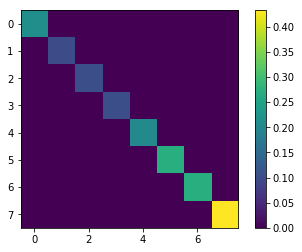

In [56]:
plt.imshow(np.abs(H[0]))
plt.colorbar()

In [ ]:
t_max=20
dt=1;steps=int(t_max*42/dt);p=-3.0
time=np.arange(steps)*t_max/steps
A=lambda t:10**p*(t==0)
TDP.propagate(dt=dt,steps=steps,A=A)

  8%|▊         | 64/840 [09:52<1:55:14,  8.91s/it]

In [ ]:
plt.imshow(TDP.wfn[0].real)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(-TDP.J[:,2].real)
plt.grid()